### [1] Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### [2] Data Loading

In [9]:
# load the data
df = pd.read_csv("../data/Admission_Predict.csv")

In [10]:
# view the data
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
# check out info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


There are 9 columns in the dataset, with 400 rows. 

In [12]:
# check missing values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no missing values in the dataset.

### [3] Explaratory Data Analysis(EDA)

Exploratory Data Analysis (EDA) is a crucial step in any data analysis or machine learning project. It involves the initial investigation of the dataset to gain insights, discover patterns, and identify trends or anomalies. EDA plays a significant role in understanding the data, refining data preprocessing steps, and guiding the selection of appropriate machine learning algorithms.

#### [3.1] Univariate Analysis
Univariate analysis focuses on examining individual variables in the dataset. It helps us understand the distribution, central tendency, and spread of each variable. We will perform univariate analysis for numerical and categorical variables separately.

In [13]:
# statistical summary
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [14]:
# droping unnecessary columns
df.drop(['Serial No.'] , axis=1, inplace=True)

/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

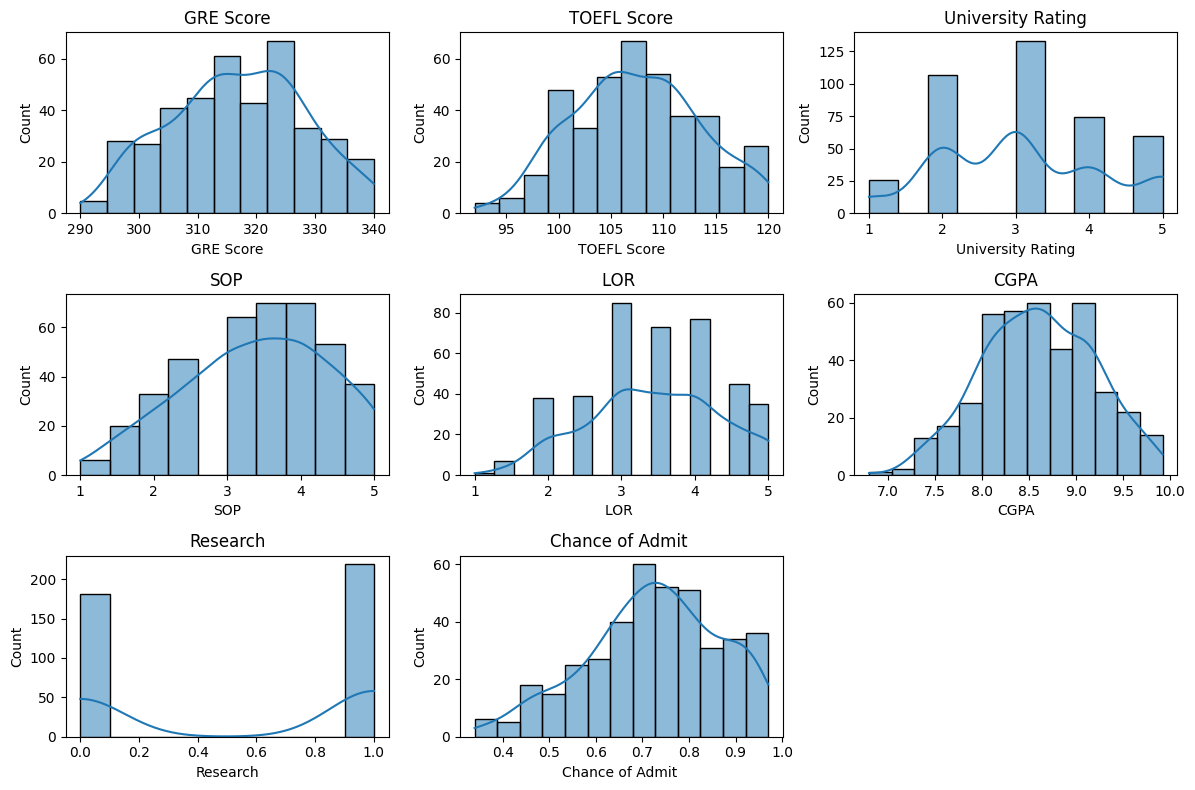

In [15]:
# Histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

##### Summary from the statistical analysis and Histograms

1. GRE scores - The mean GRE score is 316.8, with a standard deviation of 11.47. The distribution of GRE scores is almost normal, with a slight right skew. The minimum GRE score is 290, and the maximum GRE score is 340.
2. TOEFL scores - The mean TOEFL score is 107.41, with a standard deviation of 6.07. The distribution of TOEFL scores is almost normal, with a slight right skew. The minimum TOEFL score is 93, and the maximum TOEFL score is 120.
3. University Rating - The mean university rating is 3.09, with a standard deviation of 1.14. The distribution of university ratings is almost normal, with a slight left skew. The minimum university rating is 1, and the maximum university rating is 5.
4. Statement of Purpose (SOP) - The mean SOP score is 3.39, with a standard deviation of 0.99. The distribution of SOP scores is almost normal, with a slight left skew. The minimum SOP score is 1, and the maximum SOP score is 5.
5. Letter of Recommendation (LOR) - The mean LOR score is 3.45, with a standard deviation of 0.90. The distribution of LOR scores is almost normal, with a slight left skew. The minimum LOR score is 1, and the maximum LOR score is 5.
6. CGPA - The mean CGPA score is 8.60, with a standard deviation of 0.60. The distribution of CGPA scores is almost normal, with a slight left skew. The minimum CGPA score is 6.80, and the maximum CGPA score is 9.92.
7. Research - The mean research score is 0.55, with a standard deviation of 0.50. The distribution of research scores is almost normal, with a slight right skew. The minimum research score is 0, and the maximum research score is 1.
8. Chance of Admit - The mean chance of admit is 0.72, with a standard deviation of 0.14. The distribution of chance of admit is almost normal, with a slight left skew. The minimum chance of admit is 0.34, and the maximum chance of admit is 0.97.

/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


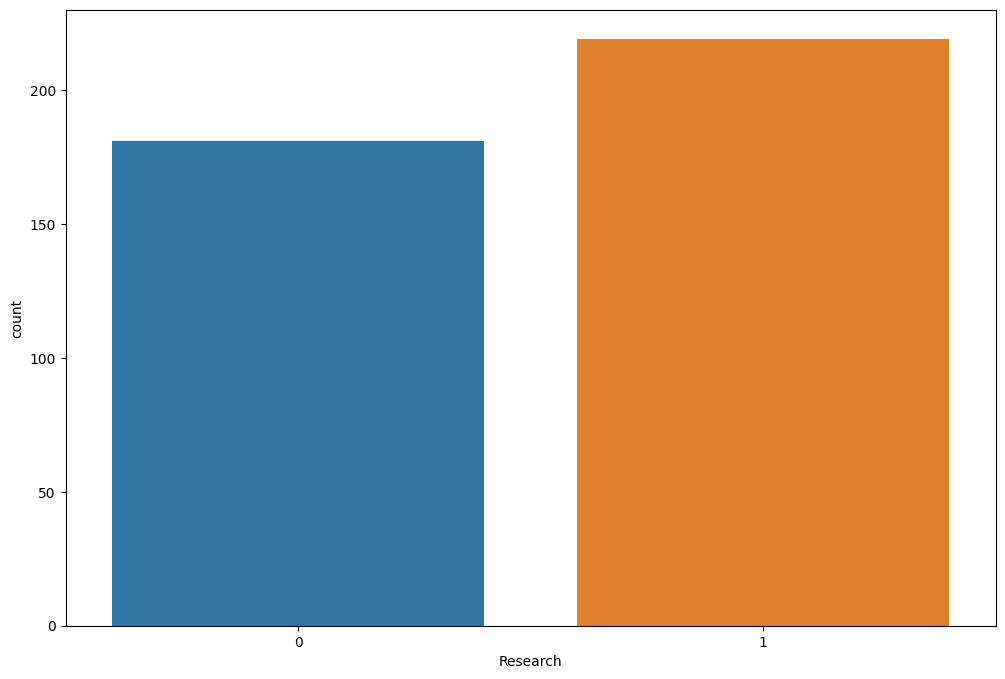

In [16]:
# Distribution of research
plt.figure(figsize=(12, 8))
sns.countplot(x='Research', data=df)
plt.show()

from the above chart we realize that the the people who did research [1] are high than the people who didnt do research

<Axes: title={'center': 'University Rating Pie Chart'}, ylabel='count'>

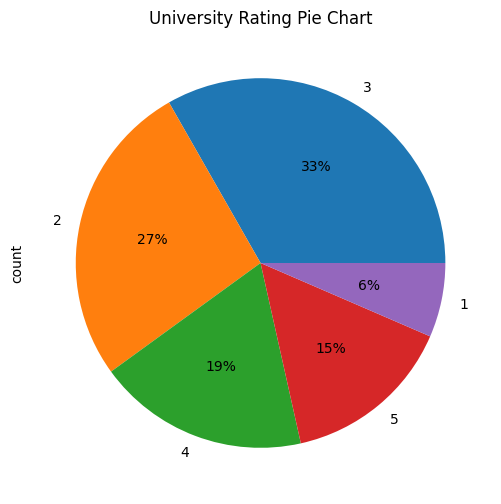

In [17]:
df['University Rating'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(8,6),
                                            title="University Rating Pie Chart")

The pie chart above shows that:
- Most university are rated out of 3 with a percentage of 33%, followed by a rating of 2 with a 27%, rating of 4 with a percentage of 19%, rating of 5 with 15% and lastly 1 with 16%

#### [3.2] Bivariate and Multivariate Analysis:
Bivariate analysis involves exploring the relationship between two variables, while multivariate analysis examines the relationships among multiple variables simultaneously. We will visualize the relationships between features and the target variable

<Axes: title={'center': 'GRE Score vs Chance of Admit'}, xlabel='GRE Score', ylabel='Chance of Admit '>

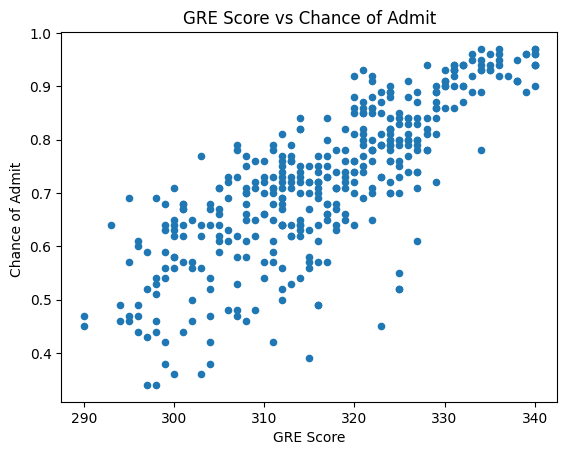

In [18]:
df.plot(kind="scatter", x='GRE Score', y = 'Chance of Admit ', title="GRE Score vs Chance of Admit")

<Axes: title={'center': 'TOEFL_Score vs Chance_ofAdmit'}, xlabel='TOEFL Score', ylabel='Chance of Admit '>

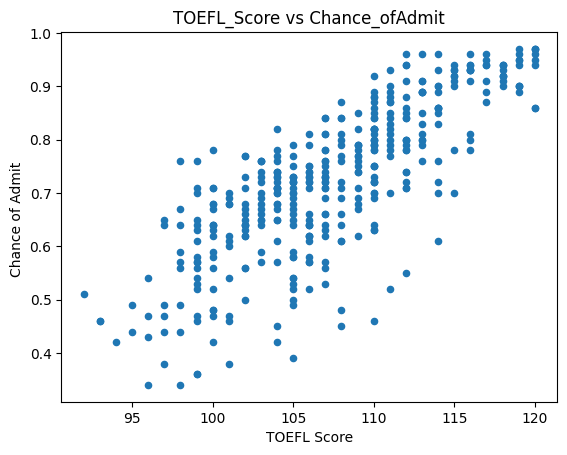

In [19]:
df.plot(kind="scatter", x='TOEFL Score', y = 'Chance of Admit ' , title="TOEFL_Score vs Chance_ofAdmit")

Text(0, 0.5, 'Chance of Admission')

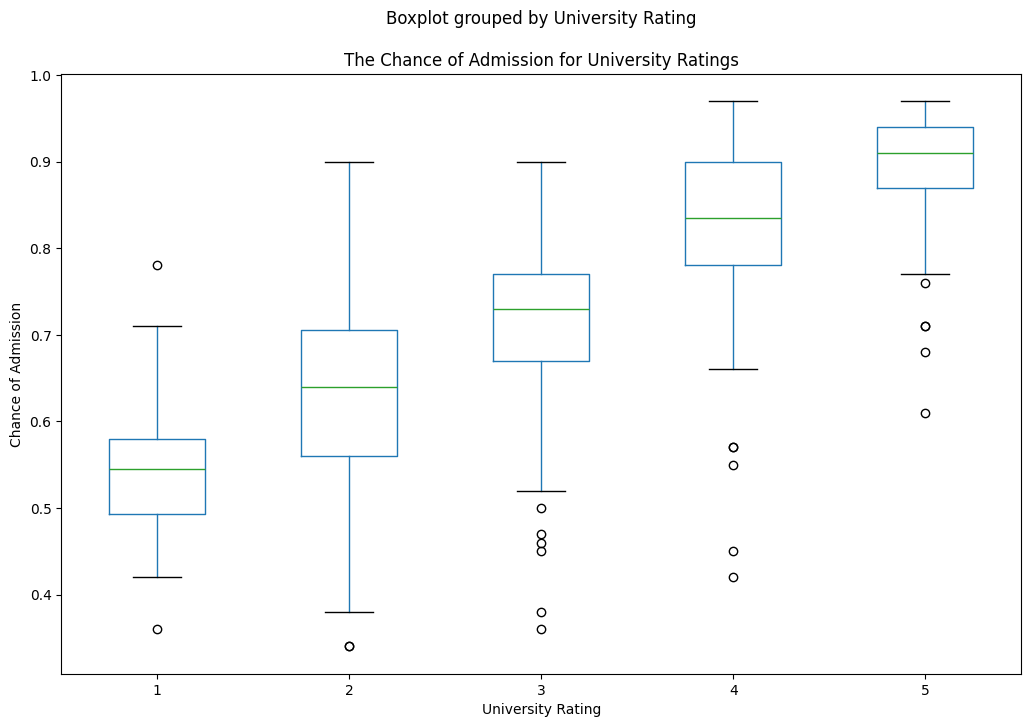

In [20]:
df.boxplot(column='Chance of Admit ',by='University Rating',grid=False,figsize=(12,8))
plt.title('The Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')

#### Correlation Heatmap for numerical variables
1. Creating a mask for the lower triangle:
The mask is a boolean matrix with the same shape as the correlation matrix. The np.triu() function sets the upper triangle of the matrix to True (1) and the lower triangle to False (0). By using np.ones_like(), we create a matrix of ones with the same shape as the correlation matrix. Finally, by specifying dtype=bool, we convert all the ones in the matrix to True and all other values to False.

2. We set the figure size for the heatmap and then use Seaborn's heatmap() function to plot the correlation matrix. The annot=True argument adds the numerical values to the heatmap cells. The cmap='coolwarm' argument sets the color map for the heatmap, where cooler colors represent negative correlation, and warmer colors represent positive correlation. The center=0 argument sets the center of the color map to 0, making 0 correlation appear as a white cell. The mask=mask argument specifies the mask created earlier to display only the lower triangle of the heatmap.

/home/penscola/.local/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Correlation Heatmap')

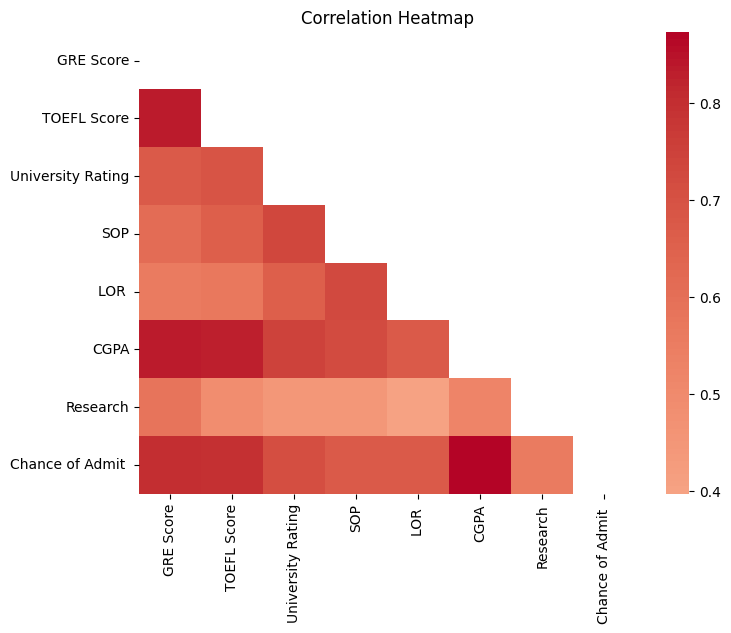

In [21]:
# Correlation Heatmap for numerical variables
correlation_matrix = df.corr()

# Mask to display only the lower triangle of the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, mask=mask)
plt.title("Correlation Heatmap")

#### From the output of the correlation heatmap, we can make the following observations:
- Most of the correlations are relatively weak: The majority of the numerical variables have correlations close to 0. This suggests that there is no strong linear relationship between these variables.

- Positive correlations: Some variables have positive correlations, which means that as one variable increases, the other tends to increase as well. For example, there is a positive correlation between "SOP" and "LOR."

- Negative correlations: There are also negative correlations between certain variables, indicating that as one variable increases, the other tends to decrease.

- Strong correlation between "GRE Score" and "TOEFL Score": "GRE Score" and "TOEFL Score" have a relatively stronger positive correlation compared to other pairs of variables, suggesting that there might be some relationship between these two variables.

### [4] Feature Processing & Engineering

In [22]:
# Separate the target label 'Chance of Admit' from the features in df
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

In [23]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [24]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

##### Splitting the data into training and validation sets (80% train, 20% validation)


In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.